### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: Bike Sharing

## Student(s): Jonathan Law

#### Date: 6/15/2018
---

#### Abstract
---

Using information gathered from Capital Bike Sharing and addtional weather data, I've shown that bike rentals decrease during winter and during bad weather, that registered users are more willing to brave poor weather in order to get their subscription's worth, and that peak hours happend from 5am-8am and from 3pm-5pm.

### 1. Introduction
---

#### The Dataset

The dataset is a combination of data from the bike sharing company and weather data. It contains the date, the season, the month, the weekday, the weather type, the temperature, the adjusted temperature (or how it feels), the humidity, the windspeed, the number of casual users, the number of registered users, and the total number of users. Several columns have been standardized by dividing by their maximum value.
    
#### The Objectives

The main questions I wanted to answer were:
* How does the weather and seasons affect the number of bike users?
* How does the number of users vary throughout the week?
* How do the usage of the bikes differ between casual and registered users?
* What are the peak usage hours?
    
#### Methods and Techniques

For this project I used several different visualization techniques to draw insights from the data. As I find that boxplots show the most amount of information at a glance, I prefer using those rather than pure averages. I used a lot of side-by-side boxplots to compare means and variance between different sections of data. I also used line graphs to track peaks and valleys of usage. Because the dataset was complete, I did not have to use any fill techniques.

#### Findings

My main findings were that bike rentals decrease during winter and during bad weather, that registered users are more willing to brave poor weather in order to get their subscription's worth, and that peak hours happend from 5am-8am and from 3pm-5pm.

### 2. Problem Definition
---

This sort of data would be very useful to any company that does bike sharing, especially ones with membership services. This data and the analyses drawn from it would help to predict usage patterns and forecast the number of users on a given day. Stakeholders might include the operations board of directors at a bike sharing company or a city planner wanting to know how many bikes will be used in their city based on average weather data. 

### 3. Data Sources
---

I found the data on Kaggle.com\*, where someone combined data from the Capital Bike Sharing company with weather data from Free Meteo\*\*. The data comes in two CSV files, one for the daily data and one for the hourly data. It's easily downloadable from Kaggle.

\* https://www.kaggle.com/marklvl/bike-sharing-dataset

\*\* http://www.freemeteo.com

### 4. Acquiring and Loading Data
---

In [118]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into two DataFrames
daily = pd.read_csv("day.csv")
hourly = pd.read_csv("hour.csv")
daily.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In [115]:
hourly.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


### 5. Wrangling and Cleansing Data
---

Three of the columns, `temperature`, `adjusted temperature`, and `windspeed` are all standardized by dividing by their max value. This makes it more useful for machine learning purposes, but not as helpful for data analysis. I also remapped the weekdays and the seasons from numbers to strings.

In [119]:
# De-standardize the temperature, adjusted temperature, and windspeed
daily['temp'] = daily.apply(lambda row: row['temp'] * 41, axis=1)
daily['atemp'] = daily.apply(lambda row: row['atemp'] * 50, axis=1)
daily['windspeed'] = daily.apply(lambda row: row['windspeed'] * 67, axis=1)

# Transform numerical data to labeled data
day_dict = {0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'}
season_dict = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}

daily['weekday'] = daily.apply(lambda row: day_dict[row['weekday']], axis=1)
daily['season'] = daily.apply(lambda row: season_dict[row['season']], axis=1)

daily.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Winter,0,1,0,Saturday,0,2,14.110847,18.18125,0.805833,10.749882,331,654,985
1,2,2011-01-02,Winter,0,1,0,Sunday,0,2,14.902598,17.68695,0.696087,16.652113,131,670,801
2,3,2011-01-03,Winter,0,1,0,Monday,1,1,8.050924,9.47025,0.437273,16.636703,120,1229,1349
3,4,2011-01-04,Winter,0,1,0,Tuesday,1,1,8.200000,10.60610,0.590435,10.739832,108,1454,1562
4,5,2011-01-05,Winter,0,1,0,Wednesday,1,1,9.305237,11.46350,0.436957,12.522300,82,1518,1600


### 6. Exploring and Visualizing Data
---

#### Seasonal Usage

First, I wanted to take a look at seasonal bike usage. I created boxplots for each of the seasons to show us the mean values and variablility for each season

C:\Users\eagle\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


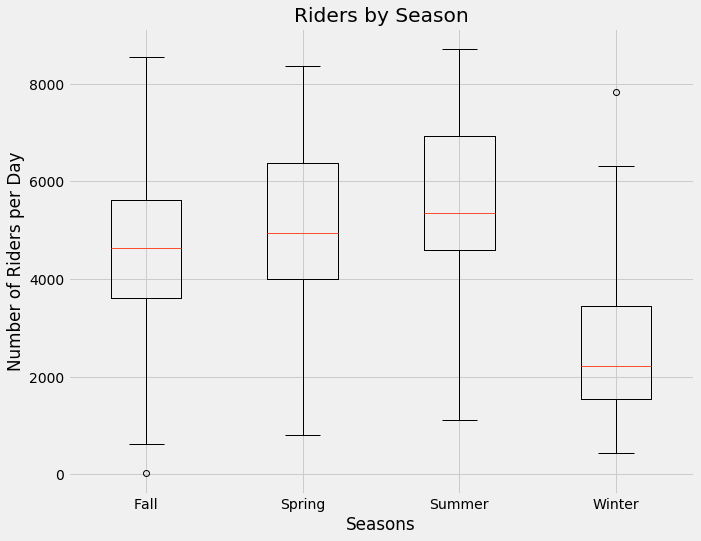

In [104]:
seasons = daily.groupby('season') # Group dataset by season

plt.figure(figsize=(10,8))
plt.style.use('fivethirtyeight')

# Plot boxplots for each season
_ = plt.boxplot([df["cnt"] for (_, df) in seasons], positions=[1,2,3,4], labels=[s for (s, _) in seasons])

# Labels
plt.title('Riders by Season')
plt.xlabel('Seasons')
plt.ylabel('Number of Riders per Day')
plt.show()

Predictably, rider numbers rise during summer and spring, but take a steep drop during winter. But we have data that distinguishes between casual riders and registered members. So how does each group respond to the seasons?

Below, I made boxplots for each group and each season for a comparison.

C:\Users\eagle\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


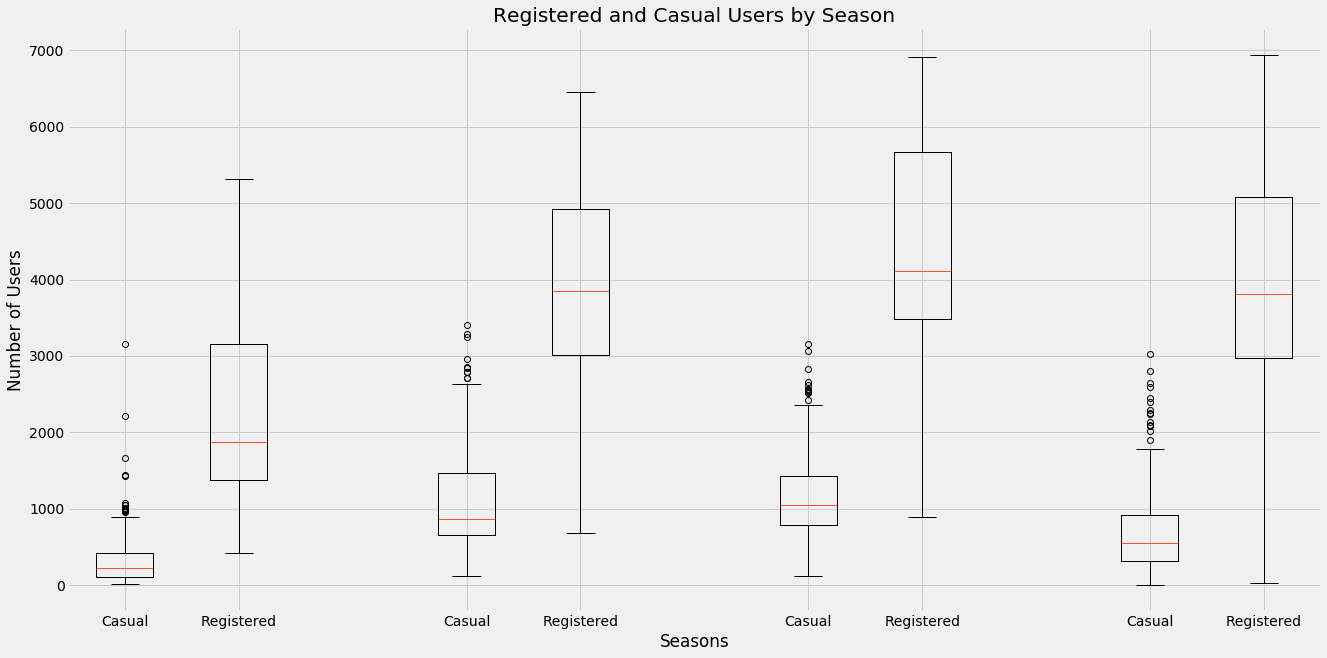

In [105]:
F, Sp, Su, W = seasons  # Explode seasons list to reorder them

fig = plt.figure(1, figsize=(20,10))

# Gather data for boxplots
data = []
for s in [W, Sp, Su, F]:
    data.append(s[1]['casual'])
    data.append(s[1]['registered'])

# Graph boxplots for each season, registerd and casual users
bp = plt.boxplot(data, positions=[1,2,4,5,7,8,10,11], labels=['Casual', 'Registered']*4)

# Labels
plt.title('Registered and Casual Users by Season')
plt.ylabel('Number of Users')
plt.xlabel('Seasons')

plt.show()

*Note: the Seasons are ordered as Winter, Spring, Summer, and Fall. I couldn't figure out how to add multiple labels*

There isn't much of a difference between the two groups of users, but there's a small difference when it comes to Fall bike usage. The drop from Summer to Fall in registered users is fairly small, and the median number of users is similar to the spring median. But for casual users, the drop is more signficant, falling almost to Winter usage levels.

If I had to interpret this, I would say that registered users feel more of a need to use the bikes to justify their subscription, and so are more willing to brave the lower temperatures in fall than casual users.

#### Temperature and Weather Data

Another portion of the data set is the daily weather: the temperature, the feeling outside, the humidity, the windspeed, and the weather pattern of the day. I compare each of them to the number of riders that day.

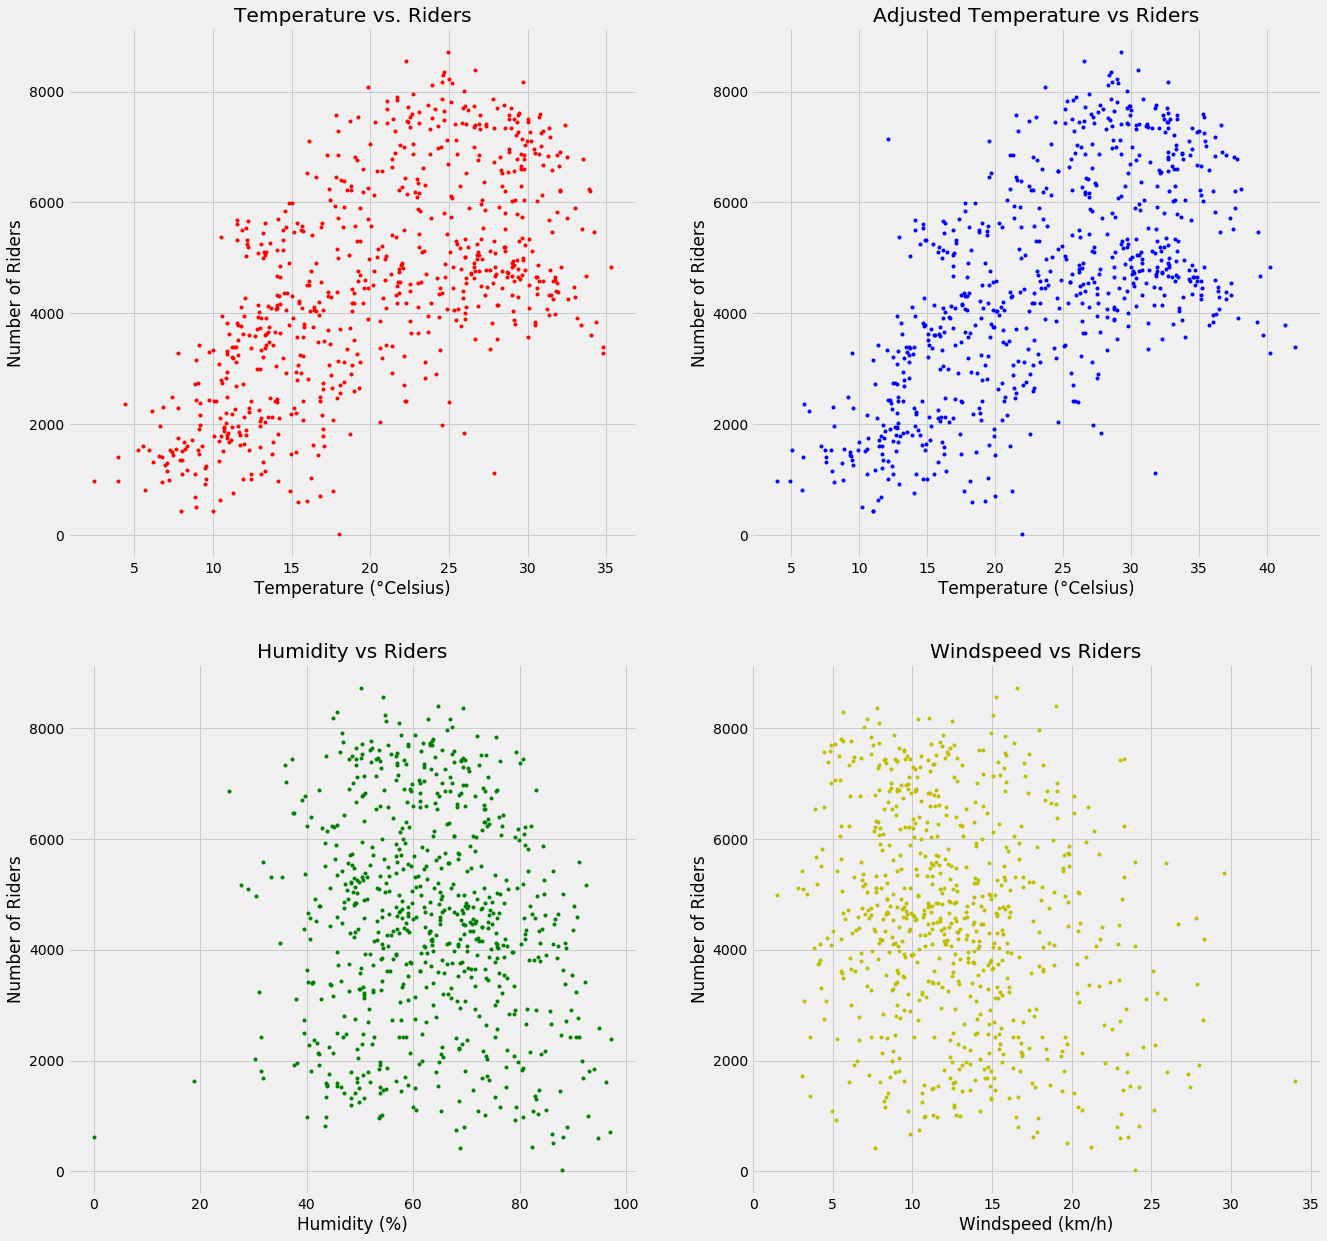

In [74]:
plt.figure(2, figsize=(20,20))

# Temperature vs Riders
plt.subplot(221)
plt.plot(daily['temp'], daily['cnt'], ".r")
plt.title('Temperature vs. Riders')
plt.xlabel('Temperature (°Celsius)')
plt.ylabel('Number of Riders')

# Adjusted Temperature vs Riders
plt.subplot(222)
plt.plot(daily['atemp'], daily['cnt'], ".b")
plt.title('Adjusted Temperature vs Riders')
plt.xlabel('Temperature (°Celsius)')
plt.ylabel('Number of Riders')

# Humidity vs Riders
plt.subplot(223)
plt.plot(daily['hum']*100, daily['cnt'], ".g")
plt.title('Humidity vs Riders')
plt.xlabel('Humidity (%)')
plt.ylabel('Number of Riders')

# Windspeed vs Riders
plt.subplot(224)
plt.plot(daily['windspeed'], daily['cnt'], ".y")
plt.title('Windspeed vs Riders')
plt.xlabel('Windspeed (km/h)')
plt.ylabel('Number of Riders')

plt.show()

Temperature and adjusted temperature had the closest correlation with the number of riders, while windspeed and humidity didn't really have any correlation. Temperature and adjusted temperature had some sort of exponential relationship, with a peak around 25-30 degrees Celsius, and starting to dip down above that temperature.

Next is general weather situation. The three conditions represented in the data set are:

- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

The fourth situation (4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) exists in the hourly dataset but does not appear in the daily dataset, so I did not include it in the graph.

C:\Users\eagle\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


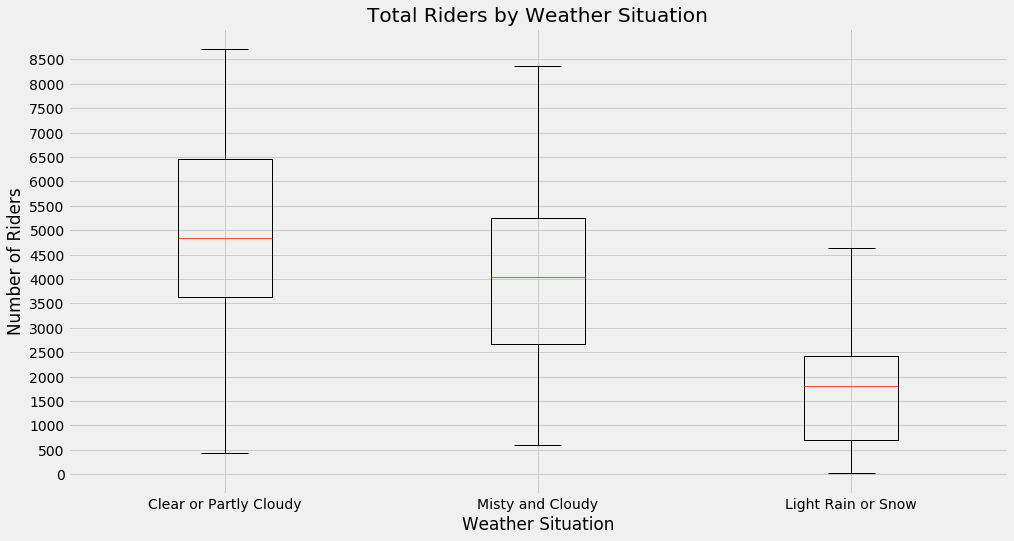

In [112]:
weather = daily.groupby('weathersit') # Group the data by weather type

# Collect data for each weather type
weather_data = []
for w, df in weather:
    weather_data.append(df['cnt'])

# Create boxplots of users by weather type
plt.figure(2, figsize=(15,8))
plt.boxplot(weather_data, positions=[1,2,3], labels=["Clear or Partly Cloudy", "Misty and Cloudy",
                                                     "Light Rain or Snow"])
# Labels
plt.title("Total Riders by Weather Situation")
plt.xlabel("Weather Situation")
plt.ylabel("Number of Riders")
plt.yticks(range(0, 9000, 500))

plt.show()

Predictably, as the weather gets worse, fewer and fewer people rent bicycles.

#### Riders by Week Day

Next I wanted to do a quick comparison of riders on a day-to-day basis.

C:\Users\eagle\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


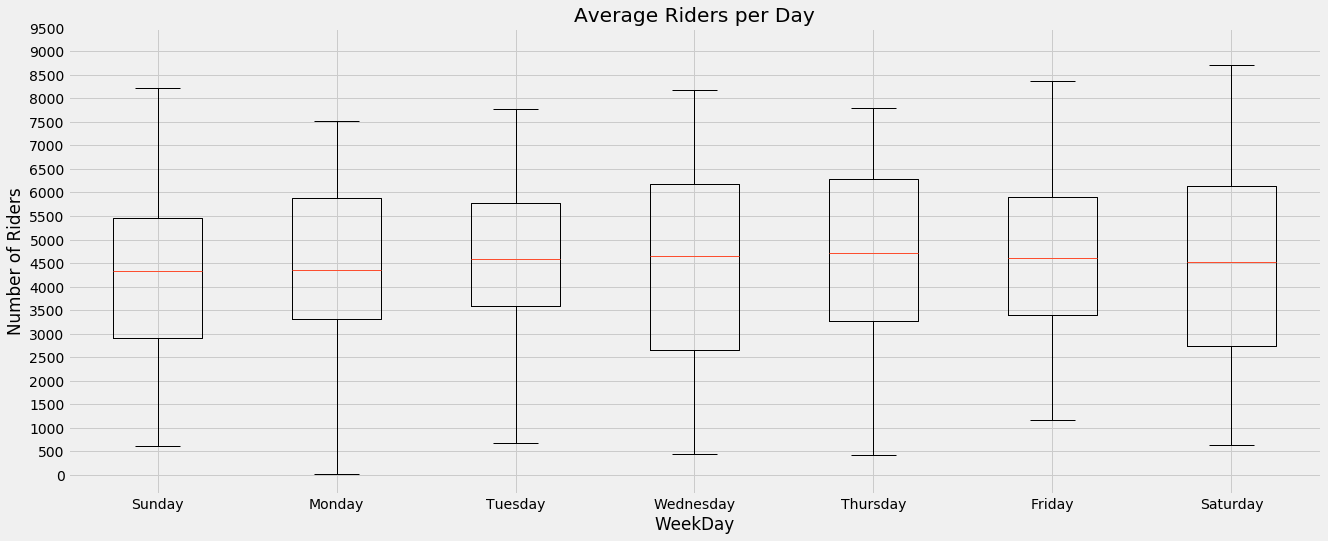

In [113]:
# Group data by week day and explode for reordering
F, M, Sa, Su, R, T, W = daily.groupby('weekday')

# Collect data for each day
weekday_data = []
labels = []
for d, df in [Su, M, T, W, R, F, Sa]:
    weekday_data.append(df['cnt'])
    labels.append(d)
    
# Create boxplot of users for each week day
plt.figure(3, figsize=(20,8))
_ = plt.boxplot(weekday_data, positions=[1,2,3,4,5,6,7], labels=labels)

# Labels and Ticks
plt.title('Average Riders per Day')
plt.xlabel('WeekDay')
plt.ylabel('Number of Riders')
plt.yticks(range(0, 10000, 500))
plt.show()

Interestingly enough, the average number of riders per day stays very consistent. Wednesday and Saturday have the most amount of variance, while Tuesday and Thursday has the least.

#### Hourly Data

Finally, I'll take a quick look at the hourly data. I grouped the data by hour and graphed the average number of users by hour.

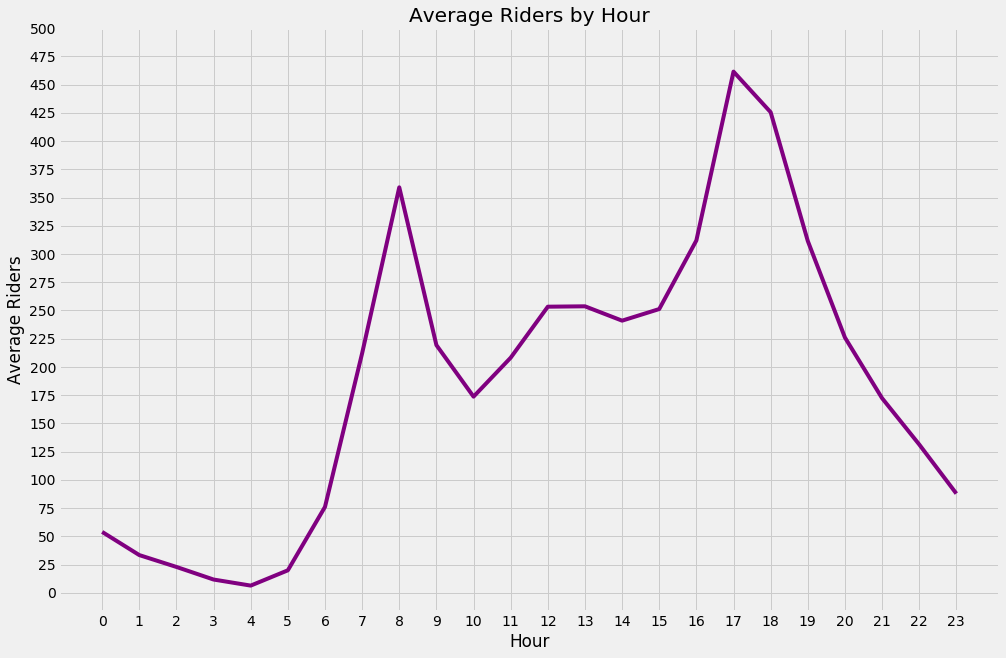

In [114]:
# Group hourly data by hour
hour_grouped = hourly.groupby('hr')

# Collect mean riders for each hour
hour_data = []
labels = []
for hour, df in hour_grouped:
    hour_data.append(df['cnt'].mean())
    labels.append(hour)

# Graph line plot of average riders per hour
plt.figure(figsize=(15,10))
_ = plt.plot(range(24), hour_data, 'purple')

# Labels and ticks
plt.xticks(range(24))
plt.yticks(range(0, 525, 25))
plt.title('Average Riders by Hour')
plt.xlabel('Hour')
plt.ylabel('Average Riders')

plt.show()

As you can see, the bike rentals really pick up between the hours of 5 and 8am, then dip down during the working day before rising again from 3pm to 5pm. The bike rentals finally begin falling but don't get close to zero until 4am the next morning, right before morning rush. As they say, it's always darkest before the dawn.


### 7. Analyzing Data
---

Using the data exploration from above, we've shown that:
* Bikes are most popular in the summer and spring, with a steep dropoff during winter
    * How steep the fall drop off is depends on whether or not the person is registered
* Bike rentals decrease as the weather gets worse
* Average bike rentals stay fairly consistent throughout the week
* Rentals peak when the temperature is in the mid-80s
* Peak hours are between 5 and 8am and between 3 and 5pm

### 8. Reporting Results
---

In recommending action to a bike sharing company, I would suggest that a real push be made to register as many users as possible. It seems clear that users who are registered are more likely to use the service, both overall and during months where the weather is not as favorable. It also may be a good idea to offer discounts on days when the weather is foggy or misty or on days that the weather dips below 15 degrees Celsius in order to drive up sales a bit. It may also be a good idea to dynamically price the rides, especially for casual users, based on the season. For example, the company could charge 15% more during summer months than in spring or fall but charge 15% less during winter months. This may help to increase the number of people who use the bike sharing service during these "off" months.

### 9. Conclusion
---

Mostly what I discovered doing this project is that the coding is easy but writing up a formal report can be difficult. I learned that it especially helps to document and clean up your code along the way so that you don't have to do it all at once at the end of the project.